<a href="https://colab.research.google.com/github/ApphiaAidoo/Learning-Pytorch/blob/main/Assessment_Test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import math

import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.hub import load_state_dict_from_url

from PIL import Image
import matplotlib.pyplot as plt

import pandas as pd

from torch.utils.data import Dataset
from torchvision import datasets, transforms
import torchvision
import os
from natsort import natsorted
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [ ]:
import cv2

In [ ]:
os.getcwd()

'C:\\Users\\apphi\\Downloads\\Data Set'

In [ ]:
f = open('class.txt','r')
print(f.read())

0	baboon	
1	banana
2	bee
3	bison
4	butterfly
5	candle
6	cardigan
7	chihuahua
8	elephant
9	espresso
10	fly
11	goldfish
12	goose
13	grasshopper
14	hourglass
15	icecream
16	ipod
17	jellyfish
18	koala
19	ladybug
20	lion
21	mushroom
22	penguin
23	pig
24	pizza
25	pretzel
26	redpanda
27	refrigerator
28	sombrero
29	umbrella


In [ ]:
# Define path
train_dir ="train_set/"
test_dir ="test_set/"
classes_file = "class.txt"

In [ ]:
class TinyImage30Dataset(Dataset):
    def __init__(self, main_dir, classfile='class.txt', transform=None):
        self.main_dir = main_dir
        self.transform = transform
        self.classfile=classfile
        self.class_to_idx = self._load_classes()
        self.img_labels = self._load_images_and_labels()

    def _load_classes(self):
        classes = pd.read_csv(self.classfile, sep="\t", usecols=[0,1], header=None)
        return {class_name: i for i, class_name in enumerate(list(classes[1]))}
    def _load_images_and_labels(self):
        img_labels = []
        for class_name in os.listdir(self.main_dir+self.main_dir):
            class_dir = os.path.join(self.main_dir+self.main_dir, class_name)
            if not os.path.isdir(class_dir):
                continue
            for img_file in natsorted(os.listdir(class_dir)):
                img_path = os.path.join(class_dir, img_file)
                label = self.class_to_idx[class_name]
                img_labels.append((img_path, label))
        return img_labels

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path, label = self.img_labels[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

# Example usage
transform = transforms.Compose([
   # transforms.Resize((32, 32)),
    transforms.ToTensor()
   # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

dataset = TinyImage30Dataset(main_dir=train_dir, classfile=classes_file, transform=transform)

train_dataset = TinyImage30Dataset(main_dir=train_dir, classfile=classes_file, transform=transform)
test_dataset = TinyImage30Dataset(main_dir=test_dir, classfile=classes_file, transform=transform)




In [ ]:
# split the train_test
x = train_dataset
y = train_test_split (x, train_size = 0.8, random_state = 0)


10800


In [ ]:
print(y[1].__len__())
train_set = y[0]
print(train_set.__len__())
val_set = y[1]
print(val_set.__len__())

2700
10800
2700


In [ ]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
val_loader =   DataLoader(val_set,batch_size = 64, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


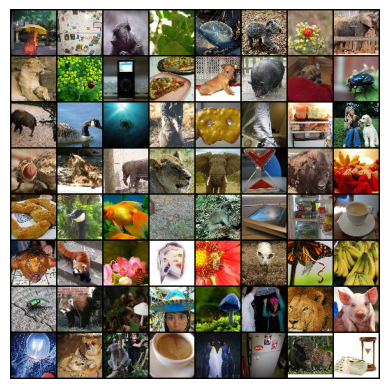

29 27 0 13 17 18 19 8 20 19 16 24 7 23 7 10 3 12 17 0 25 16 27 7 10 20 8 20 8 14 3 1 25 12 11 0 0 16 27 9 23 26 2 27 2 23 4 1 10 26 21 28 21 28 20 23 17 7 18 9 22 27 3 14


In [ ]:
def timshow(x):
    xa = np.transpose(x.numpy(), (1,2,0))
    plt.imshow(xa)
    plt.axis('off')
    plt.show()
    return xa

dataiter = iter(train_loader)
images, labels = next(dataiter)

timshow(torchvision.utils.make_grid(images))
print(*labels.numpy())

In [ ]:
from torch import nn, optim

class CustomModel(nn.Module):
    def __init__(self, input_size=12288, hidden_size=100, output_size=30, learning_rate=0.001):
        super(CustomModel, self).__init__()
        # Define layers
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
        # Activation function
        self.relu = nn.ReLU()

        # Loss function
        self.criterion = nn.CrossEntropyLoss()

        # Optimizer
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)

    def forward(self, x):
        x= x.reshape(x.size(0), -1)
        x = self.relu(self.layer1(x))
        x = self.layer2(x)
        return x

    def train_step(self, inputs, labels):
        # Forward pass
        outputs = self.forward(inputs)
        loss = self.criterion(outputs, labels)

        # Backward pass and optimization
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        return loss.item()




In [ ]:
model =CustomModel()

In [ ]:
## Training the MLP
model.train


for epoch in range(5):  # loop over the dataset multiple times

    # initialise variables for mean loss calculation
    running_loss = 0.0
    n = 0

    for data in train_loader:
        inputs, labels = data

        # Forward, backward, and update parameters
        loss = model.train_step(inputs,labels)
        # accumulate loss and increment minibatches
        running_loss += loss
        n += 1

    # record the mean loss for this epoch and show progress
    #losses[epoch] = running_loss / n
    #print(f"epoch: {epoch+1} loss: {losses[epoch] : .3f}")

# save network parameters and losses
#torch.save({"state_dict": net.state_dict(), "losses": losses}, results_path)

NameError: name 'net' is not defined